In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import fftpack
import datetime
from sklearn import mixture

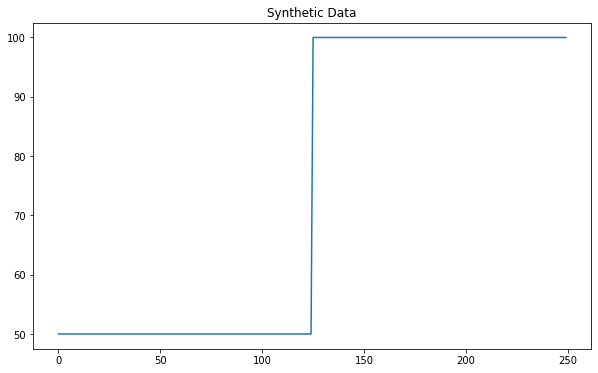

In [2]:
x = np.arange(0, 250)
y = np.linspace(50, 50, 250)
y1 = 100
for i in range (125, 250):
    y[i] = y1
sd = y
plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.title("Synthetic Data")
plt.show()

In [3]:
pd.DataFrame(sd).describe()

,0
count,250.000000
mean,75.000000
std,25.050151
min,50.000000
25%,50.000000
50%,75.000000
75%,100.000000
max,100.000000


In [4]:
seasonal_data = pd.DataFrame(zip(x,y),columns=['Time','Value'])
seasonal_data

,Time,Value
0,0,50.0
1,1,50.0
2,2,50.0
3,3,50.0
4,4,50.0
...,...,...
245,245,100.0
246,246,100.0
247,247,100.0
248,248,100.0


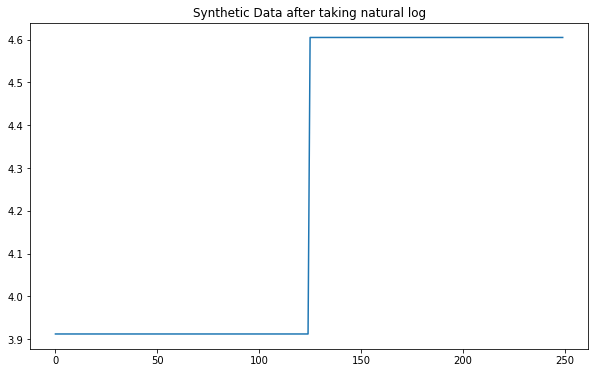

In [5]:
log_data = np.log(seasonal_data['Value'])
plt.figure(figsize=(10,6))
plt.plot(seasonal_data['Time'], log_data)
plt.title("Synthetic Data after taking natural log")
plt.show()

In [6]:
nlog_data = pd.DataFrame(zip(seasonal_data['Time'], log_data),columns=['Time','Log Value'])
nlog_data

,Time,Log Value
0,0,3.912023
1,1,3.912023
2,2,3.912023
3,3,3.912023
4,4,3.912023
...,...,...
245,245,4.605170
246,246,4.605170
247,247,4.605170
248,248,4.605170


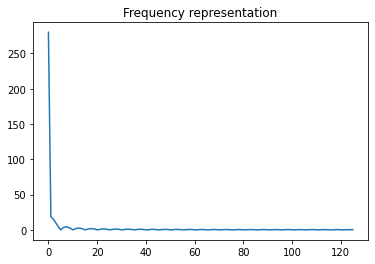

In [95]:
N = 250
sr = 1
y = np.array(seasonal_data['Value'])
f = fftpack.fftfreq(len(y))
yf = fftpack.fft(y)

T = 1.0 / N
x = np.linspace(0.0, N*T, N)
xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.title("Frequency representation")
plt.show()

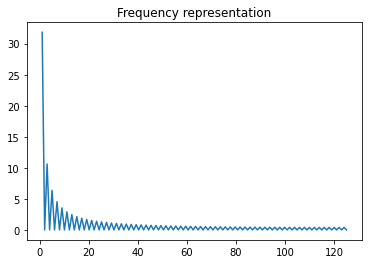

In [9]:
N = 250
sr = 1
y = np.array(seasonal_data['Value'])
f = fftpack.fftfreq(len(y))
yf = fftpack.fft(y)

T = 1.0 / N
x = np.linspace(0.0, N*T, N)
xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
fig, ax = plt.subplots()
ax.plot(xf[1:], 2.0/N * np.abs(yf[1:N//2]))
plt.title("Frequency representation")
plt.show()

In [10]:
freq_ampli = pd.DataFrame(zip(np.abs(f[:N//2]),2.0/N * np.abs(yf[:N//2])),columns=['Freq','Ampli'])
freq_ampli

,Freq,Ampli
0,0.000,1.500000e+02
1,0.004,3.183183e+01
2,0.008,1.054199e-15
3,0.012,1.061284e+01
4,0.016,3.040060e-15
...,...,...
120,0.480,2.842171e-17
121,0.484,4.005059e-01
122,0.488,9.134828e-16
123,0.492,4.001264e-01


In [11]:
frame_size = 50
Fs = 1
dt = 1/Fs
freq_vector = np.fft.rfftfreq(frame_size, d=dt)
yf1 = yf[yf != 0]
yf1

array([ 1.87500000e+04-0.00000000e+00j, -5.00000000e+01+3.97866414e+03j,
        1.03028697e-13+8.21565038e-14j, -5.00000000e+01+1.32566281e+03j,
        8.88178420e-14+3.69482223e-13j, -5.00000000e+01+7.94727242e+02j,
        3.55271368e-14-2.26929586e-13j, -5.00000000e+01+5.66943678e+02j,
        3.55271368e-14+5.59552404e-14j, -5.00000000e+01+4.40210499e+02j,
        7.10542736e-15-1.50990331e-14j, -5.00000000e+01+3.59409005e+02j,
        9.23705556e-14+3.90798505e-14j, -5.00000000e+01+3.03339628e+02j,
       -2.16715534e-13+3.37507799e-14j, -5.00000000e+01+2.62109179e+02j,
        2.13162821e-13+2.66453526e-14j, -5.00000000e+01+2.30480035e+02j,
        4.61852778e-14+5.68434189e-14j, -5.00000000e+01+2.05419842e+02j,
       -3.55271368e-14+7.63833441e-14j, -5.00000000e+01+1.85051385e+02j,
        3.19744231e-14+1.77635684e-14j, -5.00000000e+01+1.68150352e+02j,
        2.80664381e-13+2.68229883e-13j, -5.00000000e+01+1.53884177e+02j,
       -2.62900812e-13-2.57571742e-13j, -5.00000000

In [12]:
quefrency = np.fft.rfftfreq(np.log(yf1).size,freq_vector[1] - freq_vector[0])
cepstrum = np.fft.rfft(np.log(np.abs(yf1)))

In [13]:
quefrency[1:]

array([ 0.2016129 ,  0.40322581,  0.60483871,  0.80645161,  1.00806452,
        1.20967742,  1.41129032,  1.61290323,  1.81451613,  2.01612903,
        2.21774194,  2.41935484,  2.62096774,  2.82258065,  3.02419355,
        3.22580645,  3.42741935,  3.62903226,  3.83064516,  4.03225806,
        4.23387097,  4.43548387,  4.63709677,  4.83870968,  5.04032258,
        5.24193548,  5.44354839,  5.64516129,  5.84677419,  6.0483871 ,
        6.25      ,  6.4516129 ,  6.65322581,  6.85483871,  7.05645161,
        7.25806452,  7.45967742,  7.66129032,  7.86290323,  8.06451613,
        8.26612903,  8.46774194,  8.66935484,  8.87096774,  9.07258065,
        9.27419355,  9.47580645,  9.67741935,  9.87903226, 10.08064516,
       10.28225806, 10.48387097, 10.68548387, 10.88709677, 11.08870968,
       11.29032258, 11.49193548, 11.69354839, 11.89516129, 12.09677419,
       12.2983871 , 12.5       , 12.7016129 , 12.90322581, 13.10483871,
       13.30645161, 13.50806452, 13.70967742, 13.91129032, 14.11

In [14]:
cepstrum[1:]

array([ 1.05007441e+02+0.00000000e+00j,  1.02456789e+02-1.13686838e-13j,
        9.16091063e+01+0.00000000e+00j,  2.72982291e+01+0.00000000e+00j,
        6.21862801e+01+1.42108547e-14j,  3.02935242e+01-8.52651283e-14j,
        6.14994294e+01+2.84217094e-14j,  6.20647082e+01+0.00000000e+00j,
        8.79869701e+00-1.42108547e-14j,  1.03606733e+02+0.00000000e+00j,
        2.01806180e+01+2.84217094e-14j,  4.03955618e+01-1.42108547e-14j,
        7.61643234e+01+1.42108547e-14j,  1.18467298e+01-1.24344979e-14j,
        7.88164142e+01+1.42108547e-14j,  4.22392523e+01+0.00000000e+00j,
        1.58824954e+01-2.84217094e-14j,  7.86821170e+01-3.55271368e-14j,
        6.13893897e-01+3.01980663e-14j,  8.85822043e+01-7.10542736e-15j,
        2.94085514e+01+7.10542736e-15j,  2.37968009e+01-7.10542736e-15j,
        6.99752153e+01-6.39488462e-14j, -8.11794918e+00+3.55271368e-15j,
        2.72535624e+01+4.97379915e-14j,  4.18464931e+01-7.10542736e-15j,
       -1.59055382e+00+1.42108547e-14j,  8.00976725

In [15]:
cep = pd.DataFrame(zip(quefrency,cepstrum.real),columns=['Quefrency','Cepstrum'])
cep

,Quefrency,Cepstrum
0,0.000000,-3161.569033
1,0.201613,105.007441
2,0.403226,102.456789
3,0.604839,91.609106
4,0.806452,27.298229
...,...,...
120,24.193548,332.423550
121,24.395161,-792.393821
122,24.596774,1373.643091
123,24.798387,-1700.440255


In [16]:
# GMM on normal time series data
dfx = np.array(seasonal_data['Value']).reshape(-1,1)
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm0 = gmm

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number o

In [17]:
# GMM on natural log values of time series data 
dfx = np.array(nlog_data['Log Value']).reshape(-1,1)
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm1 = gmm

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number o

In [18]:
# GMM on fft data
dfx = freq_ampli.iloc[1:,1:]
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm2 = gmm

In [19]:
# GMM on cepstrum data 
dfx = cep.iloc[1:,1:]
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm3 = gmm

Results of GMM on normal time series data

In [20]:
seasonal_data.describe()

,Time,Value
count,250.000000,250.000000
mean,124.500000,75.000000
std,72.312977,25.050151
min,0.000000,50.000000
25%,62.250000,50.000000
50%,124.500000,75.000000
75%,186.750000,100.000000
max,249.000000,100.000000


In [21]:
best_gmm0

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [22]:
best_gmm0.weights_

array([0.5, 0.5])

In [23]:
best_gmm0.means_

array([[ 50.],
       [100.]])

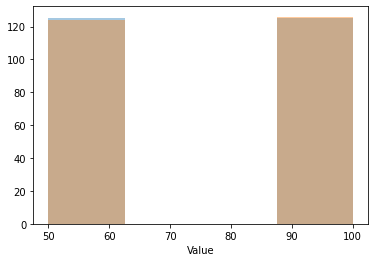

In [24]:
#Time Series
sns.distplot(seasonal_data['Value'],kde=False)
z,_ = best_gmm0.sample(250)
sns.distplot(z,kde=False)

In [25]:
#Time Series
print(best_gmm0.score(np.array(seasonal_data['Value']).reshape(-1,1)))
#print(best_gmm0.score(z))

5.29566956521752


Results of GMM on natural log values of time series data

In [26]:
nlog_data.describe()

,Time,Log Value
count,250.000000,250.000000
mean,124.500000,4.258597
std,72.312977,0.347269
min,0.000000,3.912023
25%,62.250000,3.912023
50%,124.500000,4.258597
75%,186.750000,4.605170
max,249.000000,4.605170


In [27]:
best_gmm1

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [28]:
best_gmm1.weights_

array([0.5, 0.5])

In [29]:
best_gmm1.means_

array([[4.60517019],
       [3.91202301]])

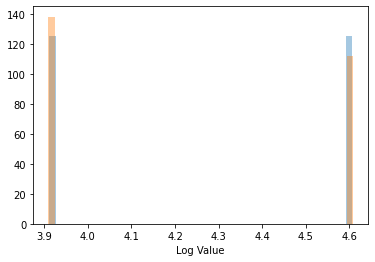

In [30]:
#Time Series - Log
sns.distplot(nlog_data['Log Value'],bins=50,kde = False)
z,_ = best_gmm1.sample(250)
sns.distplot(z,bins=50,kde=False)

In [31]:
#Time Series - Log
print(best_gmm1.score(np.array(nlog_data['Log Value']).reshape(-1,1)))
#print(best_gmm1.score(z))

5.295669527018744


Results of GMM on fft data

In [32]:
freq_ampli.describe()

,Freq,Ampli
count,125.000000,1.250000e+02
mean,0.248000,2.005665e+00
std,0.144914,1.369221e+01
min,0.000000,0.000000e+00
25%,0.124000,2.898457e-16
50%,0.248000,4.001264e-01
75%,0.372000,5.766570e-01
max,0.496000,1.500000e+02


In [33]:
best_gmm2

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [34]:
best_gmm2.weights_

array([0.2249304 , 0.00806452, 0.07966385, 0.00806452, 0.49998207,
       0.17929465])

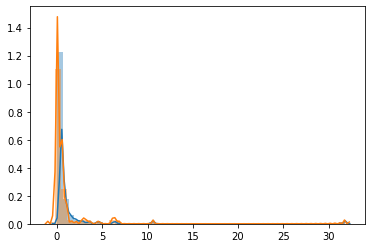

In [35]:
#Frequency
freq1 = freq_ampli.iloc[1:,1:]
y,_ = best_gmm2.sample(125)
sns.distplot(freq1)
sns.distplot(y)

In [36]:
#Freq
print(best_gmm2.score(freq1))
#print(best_gmm2.score(y))

2.1540462946467502


Results of GMM on cepstrum data

In [37]:
cep.describe()

,Quefrency,Cepstrum
count,125.000000,125.000000
mean,12.500000,-12.860587
std,7.304121,428.064152
min,0.000000,-3161.569033
25%,6.250000,0.902246
50%,12.500000,41.846493
75%,18.750000,78.682117
max,25.000000,1373.643091


In [38]:
best_gmm3

GaussianMixture(covariance_type='spherical', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [39]:
best_gmm3.weights_

array([0.16455164, 0.00806452, 0.00806452, 0.80319029, 0.00806452,
       0.00806452])

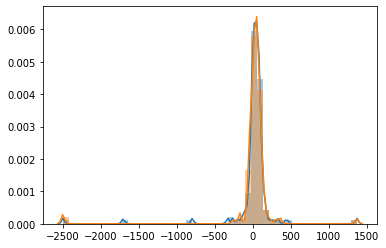

In [42]:
cep1 = cep.iloc[1:,1:]
z,_ = best_gmm3.sample(125)
sns.distplot(cep1)
sns.distplot(z)

In [43]:
print(best_gmm3.score(cep1))
#print(best_gmm3.score(z))

-5.44286910789747
